In [1]:
import pandas as pd

data_1m = pd.read_csv('/mount/Project/Project Files/Data/Finance Data/Stock/DSE-1M.csv',
            )

data_1m

,date,symbol,close,ycp
0,2023-06-01,1JANATAMF,6.10,6.10
1,2023-06-01,TB15Y1123,102.08,102.13
2,2023-06-01,TB15Y1025,102.28,102.28
3,2023-06-01,TB15Y1026,108.21,108.21
4,2023-06-01,BERGERPBL,1787.30,1800.00
...,...,...,...,...
66915,2023-01-01,TB15Y1123,104.01,104.07
66916,2023-01-01,TB15Y1029,116.61,116.90
66917,2023-01-01,BEACONPHAR,284.00,286.00
66918,2023-01-01,TB15Y1028,119.89,120.14


In [2]:
data_1m[data_1m['symbol'].isin(['1JANATAMF'])]

,date,symbol,close,ycp
0,2023-06-01,1JANATAMF,6.1,6.1
1167,2023-05-31,1JANATAMF,6.1,6.1
1958,2023-05-30,1JANATAMF,6.1,6.1
2035,2023-05-29,1JANATAMF,6.1,6.1
2990,2023-05-28,1JANATAMF,6.1,6.1
...,...,...,...,...
64278,2023-01-05,1JANATAMF,6.1,6.1
64287,2023-01-04,1JANATAMF,6.1,6.1
65191,2023-01-03,1JANATAMF,6.1,6.1
66121,2023-01-02,1JANATAMF,6.1,6.1


In [3]:
# data_1m['symbol'].unique()

In [4]:
data_1m

,date,symbol,close,ycp
0,2023-06-01,1JANATAMF,6.10,6.10
1,2023-06-01,TB15Y1123,102.08,102.13
2,2023-06-01,TB15Y1025,102.28,102.28
3,2023-06-01,TB15Y1026,108.21,108.21
4,2023-06-01,BERGERPBL,1787.30,1800.00
...,...,...,...,...
66915,2023-01-01,TB15Y1123,104.01,104.07
66916,2023-01-01,TB15Y1029,116.61,116.90
66917,2023-01-01,BEACONPHAR,284.00,286.00
66918,2023-01-01,TB15Y1028,119.89,120.14


In [5]:
import pandas as pd

# tmp = pd.DataFrame(columns=['date', ])

tmp = {
        'date' : [],
      }

for i in range(0, len(data_1m)):
    curr_date = data_1m.iloc[i]['date']
    curr_sym = data_1m.iloc[i]['symbol']
    curr_close = data_1m.iloc[i]['close']
    curr_ycp = data_1m.iloc[i]['ycp']
    
    if curr_date not in tmp['date']:
        tmp['date'].append(curr_date)
    
    new_sym_ycp_col_name = curr_sym + '_ycp'
    new_sym_cp_col_name = curr_sym + '_cp'
    
    if new_sym_cp_col_name not in tmp:
        tmp[new_sym_cp_col_name] = []
        
    if new_sym_ycp_col_name not in tmp:
        tmp[new_sym_ycp_col_name] = []
    
    tmp[new_sym_cp_col_name].append(curr_close)
    tmp[new_sym_ycp_col_name].append(curr_ycp)
    
    
          # , 'symbol', 'close', 'ycp']
         # )

In [6]:
incorr_ = []
for i in tmp.keys():
    # print(i, ' : ', len(tmp[i]))
    if len(tmp[i]) < 102:
        incorr_.append(i)
        
for i in incorr_:
    del tmp[i]
        
tmp = pd.DataFrame(tmp)
# Convert the 'Date' column to datetime objects
tmp['date'] = pd.to_datetime(tmp['date'])

# Sort the DataFrame by the 'Date' column in ascending order
tmp = tmp.sort_values(by='date')
tmp

,date,1JANATAMF_cp,1JANATAMF_ycp,TB15Y1123_cp,TB15Y1123_ycp,TB15Y1025_cp,TB15Y1025_ycp,TB15Y1026_cp,TB15Y1026_ycp,BERGERPBL_cp,...,UPGDCL_cp,UPGDCL_ycp,UTTARAFIN_cp,UTTARAFIN_ycp,WATACHEM_cp,WATACHEM_ycp,ACFL_cp,ACFL_ycp,ZEALBANGLA_cp,ZEALBANGLA_ycp
101,2023-01-01,6.1,6.1,104.01,104.07,103.27,103.45,110.32,110.33,1725.2,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,170.8,172.5
100,2023-01-02,6.1,6.1,104.00,104.01,103.27,103.27,110.32,110.32,1712.2,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,169.1,170.8
99,2023-01-03,6.1,6.1,103.94,104.00,103.26,103.27,110.28,110.32,1729.3,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,167.5,169.1
98,2023-01-04,6.1,6.1,103.93,103.94,103.26,103.26,110.28,110.28,1733.5,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,165.9,167.5
97,2023-01-05,6.1,6.1,103.93,103.93,103.26,103.26,110.28,110.28,1730.0,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,164.3,165.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-28,6.1,6.1,102.13,102.18,102.29,102.07,108.22,108.26,1806.9,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,150.4,147.8
3,2023-05-29,6.1,6.1,102.13,102.13,102.29,102.29,108.22,108.22,1807.7,...,233.7,233.7,34.0,33.8,200.2,200.2,26.5,26.5,147.3,150.4
2,2023-05-30,6.1,6.1,102.13,102.13,102.29,102.29,108.22,108.22,1800.3,...,233.7,233.7,33.8,34.0,200.2,200.2,26.5,26.5,146.2,147.3
1,2023-05-31,6.1,6.1,102.13,102.13,102.28,102.29,108.21,108.22,1800.0,...,233.7,233.7,33.8,33.8,200.2,200.2,26.5,26.5,145.4,146.2


In [7]:
tmp = tmp.sort_index(axis=1)
# Define the desired column order with 'Date' at the beginning
desired_column_order = ['date'] + [col for col in tmp.columns if col != 'date']

# Reorder the columns
tmp = tmp[desired_column_order]
tmp = tmp.reset_index(drop=True)
tmp

,date,1JANATAMF_cp,1JANATAMF_ycp,1STPRIMFMF_cp,1STPRIMFMF_ycp,AAMRANET_cp,AAMRANET_ycp,AAMRATECH_cp,AAMRATECH_ycp,ABB1STMF_cp,...,WMSHIPYARD_cp,WMSHIPYARD_ycp,YPL_cp,YPL_ycp,ZAHEENSPIN_cp,ZAHEENSPIN_ycp,ZAHINTEX_cp,ZAHINTEX_ycp,ZEALBANGLA_cp,ZEALBANGLA_ycp
0,2023-01-01,6.1,6.1,16.4,16.5,50.3,51.4,39.0,40.0,5.2,...,11.0,11.0,18.7,18.8,12.3,12.4,9.0,9.0,170.8,172.5
1,2023-01-02,6.1,6.1,16.3,16.4,48.2,50.3,37.3,39.0,5.2,...,11.0,11.0,18.6,18.7,12.2,12.3,9.0,9.0,169.1,170.8
2,2023-01-03,6.1,6.1,16.2,16.3,50.4,48.2,38.9,37.3,5.2,...,11.0,11.0,18.5,18.6,12.1,12.2,9.0,9.0,167.5,169.1
3,2023-01-04,6.1,6.1,16.1,16.2,51.6,50.4,40.5,38.9,5.2,...,11.0,11.0,18.4,18.5,12.0,12.1,9.0,9.0,165.9,167.5
4,2023-01-05,6.1,6.1,16.0,16.1,50.4,51.6,39.3,40.5,5.2,...,11.0,11.0,18.3,18.4,11.9,12.0,9.0,9.0,164.3,165.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,6.1,6.1,14.8,14.3,76.8,77.0,35.5,36.0,5.2,...,11.0,11.0,19.8,21.3,10.0,10.0,9.0,9.0,150.4,147.8
98,2023-05-29,6.1,6.1,16.2,14.8,79.2,76.8,35.6,35.5,5.2,...,11.0,11.0,19.7,19.8,10.0,10.0,9.0,9.0,147.3,150.4
99,2023-05-30,6.1,6.1,15.8,16.2,79.6,79.2,36.2,35.6,5.2,...,11.0,11.0,21.2,19.7,9.9,10.0,9.0,9.0,146.2,147.3
100,2023-05-31,6.1,6.1,15.3,15.8,80.2,79.6,38.2,36.2,5.2,...,11.0,11.0,20.6,21.2,9.9,9.9,9.0,9.0,145.4,146.2


In [28]:
# transform_dataframe(df)

,date,A_close,A_ycp,B_close,B_ycp,C_close,C_ycp,Number of Symbols
0,1-1-1,1,2,3,10,11,12,3
1,1-2-1,4,5,6,13,14,15,3
2,1-3-1,7,8,9,16,17,18,3


In [8]:
import pandas as pd
from tqdm import tqdm

data_1m = pd.read_csv('/mount/Project/Project Files/Data/Finance Data/Stock/DSE-1M.csv',
            )



# tmp = pd.DataFrame(columns=['date', ])
def pivot_dse_df(data_1m):
    tmp = {
            'date' : [],
          }

    for i in tqdm(range(0, len(data_1m))):
        curr_date = data_1m.iloc[i]['date']
        curr_sym = data_1m.iloc[i]['symbol']
        curr_close = data_1m.iloc[i]['close']
        curr_ycp = data_1m.iloc[i]['ycp']

        if curr_date not in tmp['date']:
            tmp['date'].append(curr_date)

        new_sym_ycp_col_name = curr_sym + '_ycp'
        new_sym_cp_col_name = curr_sym + '_cp'

        if new_sym_cp_col_name not in tmp:
            tmp[new_sym_cp_col_name] = []

        if new_sym_ycp_col_name not in tmp:
            tmp[new_sym_ycp_col_name] = []

        tmp[new_sym_cp_col_name].append(curr_close)
        tmp[new_sym_ycp_col_name].append(curr_ycp)


    incorr_ = []
    for i in tmp.keys():
        # print(i, ' : ', len(tmp[i]))
        if len(tmp[i]) < 102:
            incorr_.append(i)

    for i in incorr_:
        del tmp[i]

    tmp = pd.DataFrame(tmp)
    # Convert the 'Date' column to datetime objects
    tmp['date'] = pd.to_datetime(tmp['date'])

    # Sort the DataFrame by the 'Date' column in ascending order
    tmp = tmp.sort_values(by='date')


    tmp = tmp.sort_index(axis=1)
    # Define the desired column order with 'Date' at the beginning
    desired_column_order = ['date'] + [col for col in tmp.columns if col != 'date']

    # Reorder the columns
    tmp = tmp[desired_column_order]
    tmp = tmp.reset_index(drop=True)
    return tmp

tmp = None 
data_1m = pivot_dse_df(data_1m)
data_1m

100%|██████████████████████████████████████████████| 66920/66920 [00:30<00:00, 2196.24it/s]


,date,1JANATAMF_cp,1JANATAMF_ycp,1STPRIMFMF_cp,1STPRIMFMF_ycp,AAMRANET_cp,AAMRANET_ycp,AAMRATECH_cp,AAMRATECH_ycp,ABB1STMF_cp,...,WMSHIPYARD_cp,WMSHIPYARD_ycp,YPL_cp,YPL_ycp,ZAHEENSPIN_cp,ZAHEENSPIN_ycp,ZAHINTEX_cp,ZAHINTEX_ycp,ZEALBANGLA_cp,ZEALBANGLA_ycp
0,2023-01-01,6.1,6.1,16.4,16.5,50.3,51.4,39.0,40.0,5.2,...,11.0,11.0,18.7,18.8,12.3,12.4,9.0,9.0,170.8,172.5
1,2023-01-02,6.1,6.1,16.3,16.4,48.2,50.3,37.3,39.0,5.2,...,11.0,11.0,18.6,18.7,12.2,12.3,9.0,9.0,169.1,170.8
2,2023-01-03,6.1,6.1,16.2,16.3,50.4,48.2,38.9,37.3,5.2,...,11.0,11.0,18.5,18.6,12.1,12.2,9.0,9.0,167.5,169.1
3,2023-01-04,6.1,6.1,16.1,16.2,51.6,50.4,40.5,38.9,5.2,...,11.0,11.0,18.4,18.5,12.0,12.1,9.0,9.0,165.9,167.5
4,2023-01-05,6.1,6.1,16.0,16.1,50.4,51.6,39.3,40.5,5.2,...,11.0,11.0,18.3,18.4,11.9,12.0,9.0,9.0,164.3,165.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,6.1,6.1,14.8,14.3,76.8,77.0,35.5,36.0,5.2,...,11.0,11.0,19.8,21.3,10.0,10.0,9.0,9.0,150.4,147.8
98,2023-05-29,6.1,6.1,16.2,14.8,79.2,76.8,35.6,35.5,5.2,...,11.0,11.0,19.7,19.8,10.0,10.0,9.0,9.0,147.3,150.4
99,2023-05-30,6.1,6.1,15.8,16.2,79.6,79.2,36.2,35.6,5.2,...,11.0,11.0,21.2,19.7,9.9,10.0,9.0,9.0,146.2,147.3
100,2023-05-31,6.1,6.1,15.3,15.8,80.2,79.6,38.2,36.2,5.2,...,11.0,11.0,20.6,21.2,9.9,9.9,9.0,9.0,145.4,146.2


In [9]:
data_1m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Columns: 1293 entries, date to ZEALBANGLA_ycp
dtypes: datetime64[ns](1), float64(1292)
memory usage: 1.0 MB


In [10]:
data_1m.AAMRATECH_cp # .copy()

0      39.0
1      37.3
2      38.9
3      40.5
4      39.3
       ... 
97     35.5
98     35.6
99     36.2
100    38.2
101    38.1
Name: AAMRATECH_cp, Length: 102, dtype: float64

In [11]:
def filter_columns_by_string(dataframe, target_strings):
    # Use list comprehension to filter columns containing the target strings
    filtered_columns = [col for col in dataframe.columns if any(target in col for target in target_strings)]
    
    # Create a new DataFrame with only the filtered columns
    filtered_dataframe = dataframe[filtered_columns]
    
    return filtered_dataframe

close = filter_columns_by_string(data_1m,
                         ['_cp', 'date'])                                         

close 

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
0,2023-01-01,6.1,16.4,50.3,39.0,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.7,12.3,9.0,170.8
1,2023-01-02,6.1,16.3,48.2,37.3,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.6,12.2,9.0,169.1
2,2023-01-03,6.1,16.2,50.4,38.9,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.5,12.1,9.0,167.5
3,2023-01-04,6.1,16.1,51.6,40.5,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.4,12.0,9.0,165.9
4,2023-01-05,6.1,16.0,50.4,39.3,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.3,11.9,9.0,164.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,6.1,14.8,76.8,35.5,5.2,9.9,26.5,157.7,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,19.8,10.0,9.0,150.4
98,2023-05-29,6.1,16.2,79.2,35.6,5.2,9.9,26.5,156.7,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,19.7,10.0,9.0,147.3
99,2023-05-30,6.1,15.8,79.6,36.2,5.2,9.9,26.5,157.2,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,21.2,9.9,9.0,146.2
100,2023-05-31,6.1,15.3,80.2,38.2,5.2,9.9,26.5,156.9,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,20.6,9.9,9.0,145.4


In [12]:
close.describe()

,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,ACMELAB_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
count,1.020000e+02,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.0,102.000000,102.0,102.000000,...,1.020000e+02,1.020000e+02,1.020000e+02,102.0,1.020000e+02,102.0,102.000000,102.000000,102.0,102.000000
mean,6.100000e+00,14.398039,67.915686,37.497059,5.200000e+00,9.898039,26.5,156.312745,260.2,85.263725,...,7.300000e+00,7.400000e+00,2.220000e+01,1047.7,2.002000e+02,11.0,17.705882,10.274510,9.0,138.336275
std,1.785129e-15,0.766887,9.705462,2.662332,1.785129e-15,0.019803,0.0,2.516703,0.0,0.832364,...,4.462823e-15,8.925645e-16,1.785129e-14,0.0,5.712413e-14,0.0,1.474122,0.632719,0.0,13.539161
min,6.100000e+00,13.700000,48.200000,33.200000,5.200000e+00,9.700000,26.5,155.000000,260.2,85.000000,...,7.300000e+00,7.400000e+00,2.220000e+01,1047.7,2.002000e+02,11.0,16.200000,9.900000,9.0,118.100000
25%,6.100000e+00,13.800000,60.800000,35.500000,5.200000e+00,9.900000,26.5,155.000000,260.2,85.000000,...,7.300000e+00,7.400000e+00,2.220000e+01,1047.7,2.002000e+02,11.0,16.300000,9.900000,9.0,127.125000
50%,6.100000e+00,13.950000,65.750000,37.050000,5.200000e+00,9.900000,26.5,155.000000,260.2,85.000000,...,7.300000e+00,7.400000e+00,2.220000e+01,1047.7,2.002000e+02,11.0,17.450000,9.900000,9.0,137.850000
75%,6.100000e+00,14.775000,77.450000,39.500000,5.200000e+00,9.900000,26.5,156.775000,260.2,85.000000,...,7.300000e+00,7.400000e+00,2.220000e+01,1047.7,2.002000e+02,11.0,18.500000,10.475000,9.0,146.900000
max,6.100000e+00,16.400000,86.600000,43.800000,5.200000e+00,9.900000,26.5,167.600000,260.2,91.300000,...,7.300000e+00,7.400000e+00,2.220000e+01,1047.7,2.002000e+02,11.0,22.100000,12.300000,9.0,170.800000


In [13]:
data_1m.isna().sum()[data_1m.isna().sum() > 0]

Series([], dtype: int64)

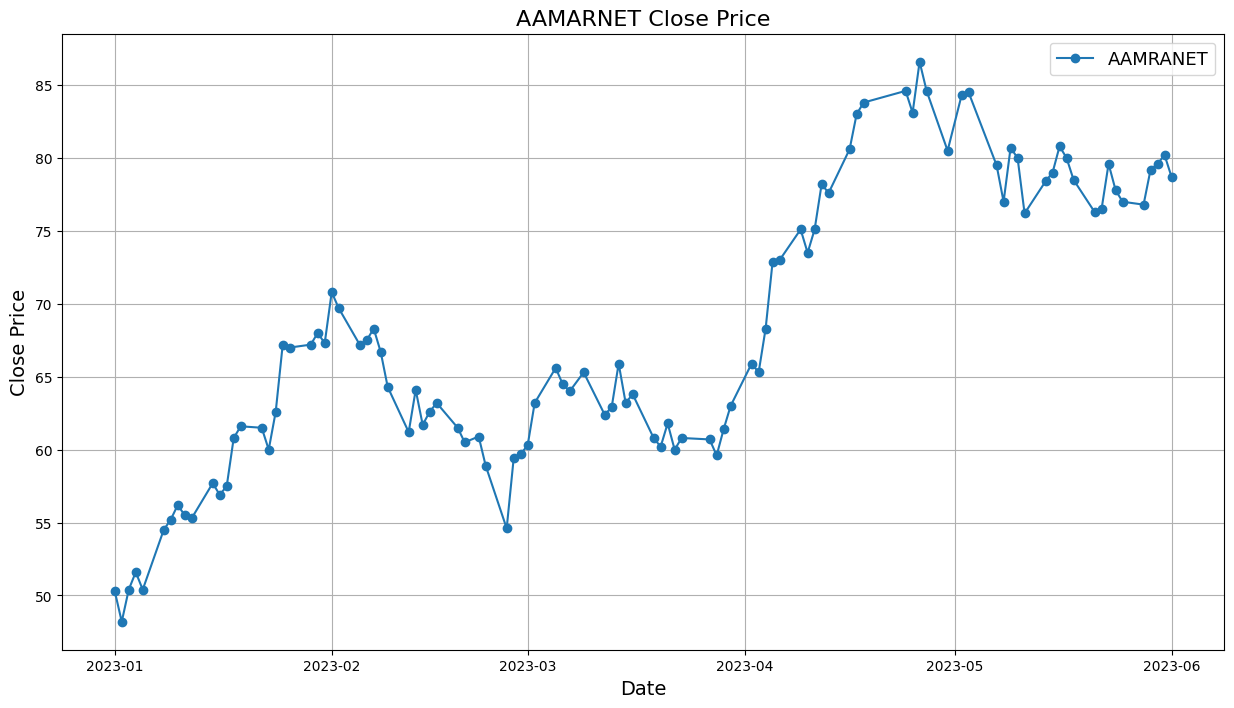

In [14]:
import matplotlib.pyplot as plt  # Import the plt module from Matplotlib

# close.AAMRANET_cp.plot(figsize = (15, 8),
                       # fontsize = 13)
plt.figure(figsize=(15, 8),
          # fontsize = 13
          )

plt.plot(close['date'], close['AAMRANET_cp'], marker='o', linestyle='-', )

# plt.legend(fontsize = 13)

# Add a grid
plt.grid(True)

# Customize other plot attributes as needed
plt.title('AAMARNET Close Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(['AAMRANET'], fontsize=13)

plt.show()

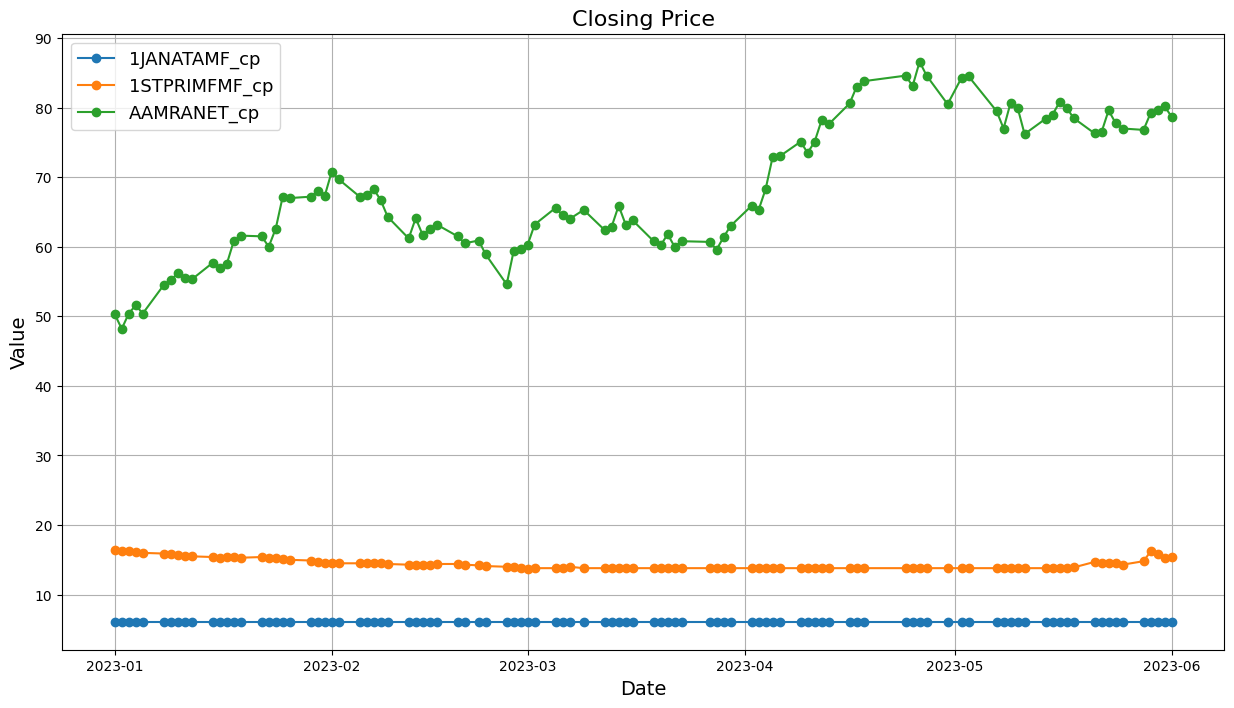

In [15]:
def plot_columns(dataframe, columns_to_plot):
    # Create a figure
    plt.figure(figsize=(15, 8))
    
    # Plot each specified column
    for col_name in columns_to_plot:
        plt.plot(
            # dataframe.index
            close['date']
            , dataframe[col_name], marker='o', linestyle='-', label=col_name)

    # Add a grid
    plt.grid(True)

    # Customize other plot attributes as needed
    plt.title('Closing Price', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(fontsize=13)
    
    # Display the plot
    plt.show()
    
plot_columns(close, list(close.columns)[1:4])

In [16]:
list(close.columns)[1:4]

['1JANATAMF_cp', '1STPRIMFMF_cp', 'AAMRANET_cp']

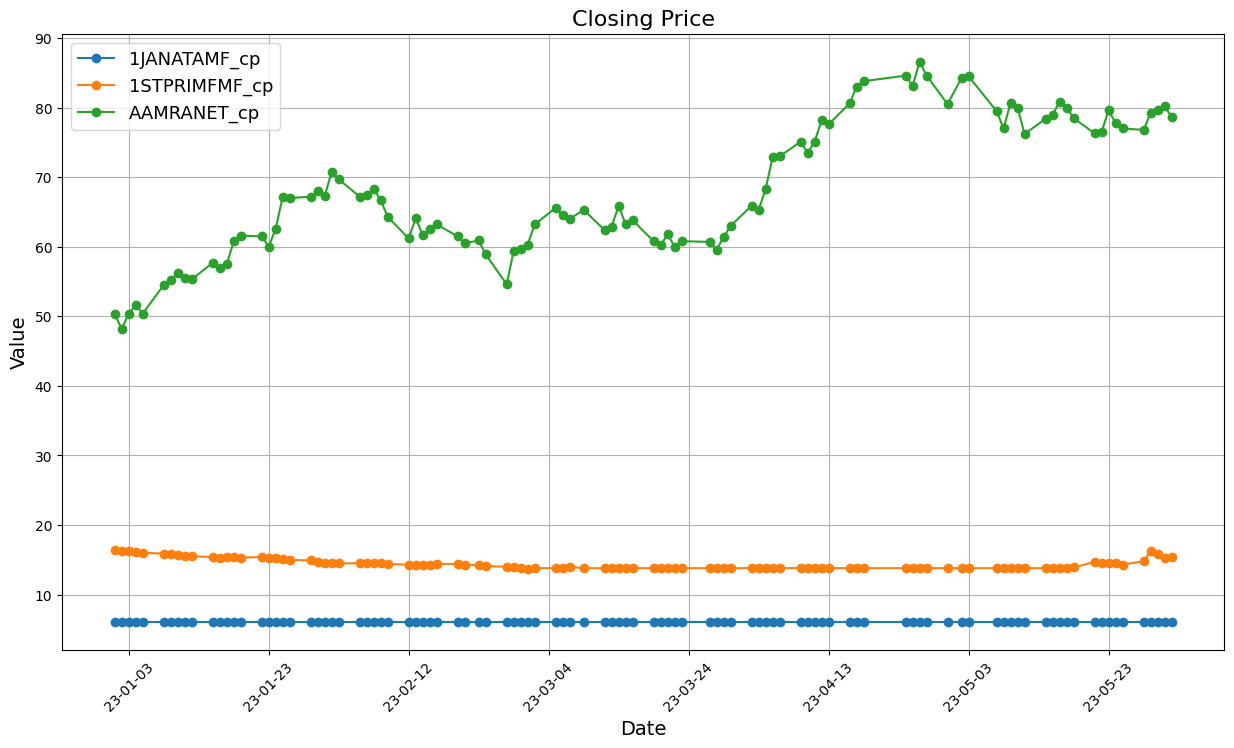

In [17]:
from matplotlib.dates import DateFormatter

def plot_columns(dataframe, columns_to_plot):
    # Create a figure
    plt.figure(figsize=(15, 8))
    
    # Use the 'date' column as x-axis values
    x_values = pd.to_datetime(dataframe['date'])
    
    # Plot each specified column
    for col_name in columns_to_plot:
        plt.plot(
            x_values,
            dataframe[col_name],
            marker='o',
            linestyle='-',
            label=col_name
        )

    # Add a grid
    plt.grid(True)

    # Customize other plot attributes as needed
    plt.title('Closing Price', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(fontsize=13)

    # Format the date on the x-axis as 'YY-MM-DD'
    date_format = DateFormatter('%y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of date ticks
    
    # Rotate the date labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()
    
plot_columns(close, list(close.columns)[1:4])   

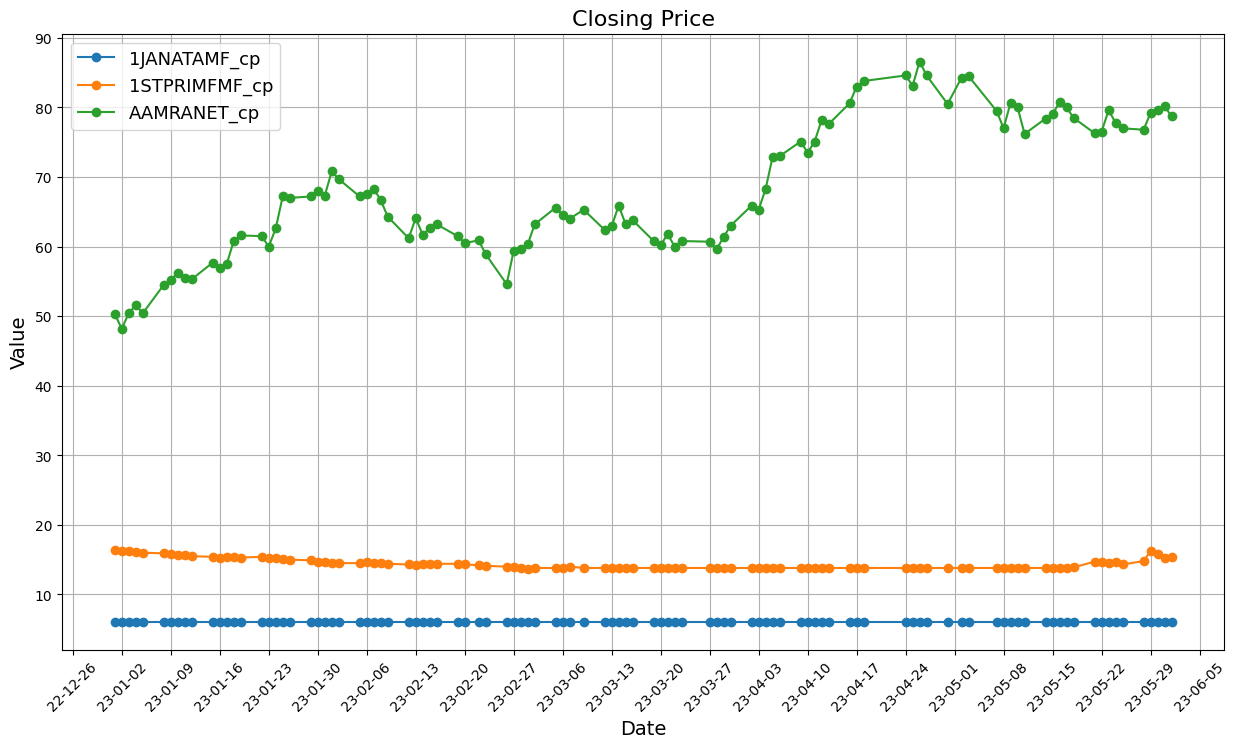

In [18]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
import pandas as pd

def plot_columns(dataframe, columns_to_plot):
    # Create a figure
    plt.figure(figsize=(15, 8))
    
    # Use the 'date' column as x-axis values
    x_values = pd.to_datetime(dataframe['date'])
    
    # Plot each specified column
    for col_name in columns_to_plot:
        plt.plot(
            x_values,
            dataframe[col_name],
            marker='o',
            linestyle='-',
            label=col_name
        )

    # Add a grid
    plt.grid(True)

    # Customize other plot attributes as needed
    plt.title('Closing Price', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(fontsize=13)

    # Format the date on the x-axis as 'YY-MM-DD'
    date_format = DateFormatter('%y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    
    # Set ticks at the start of each week
    plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
    
    # Rotate the date labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

    
plot_columns(close, list(close.columns)[1:4])      

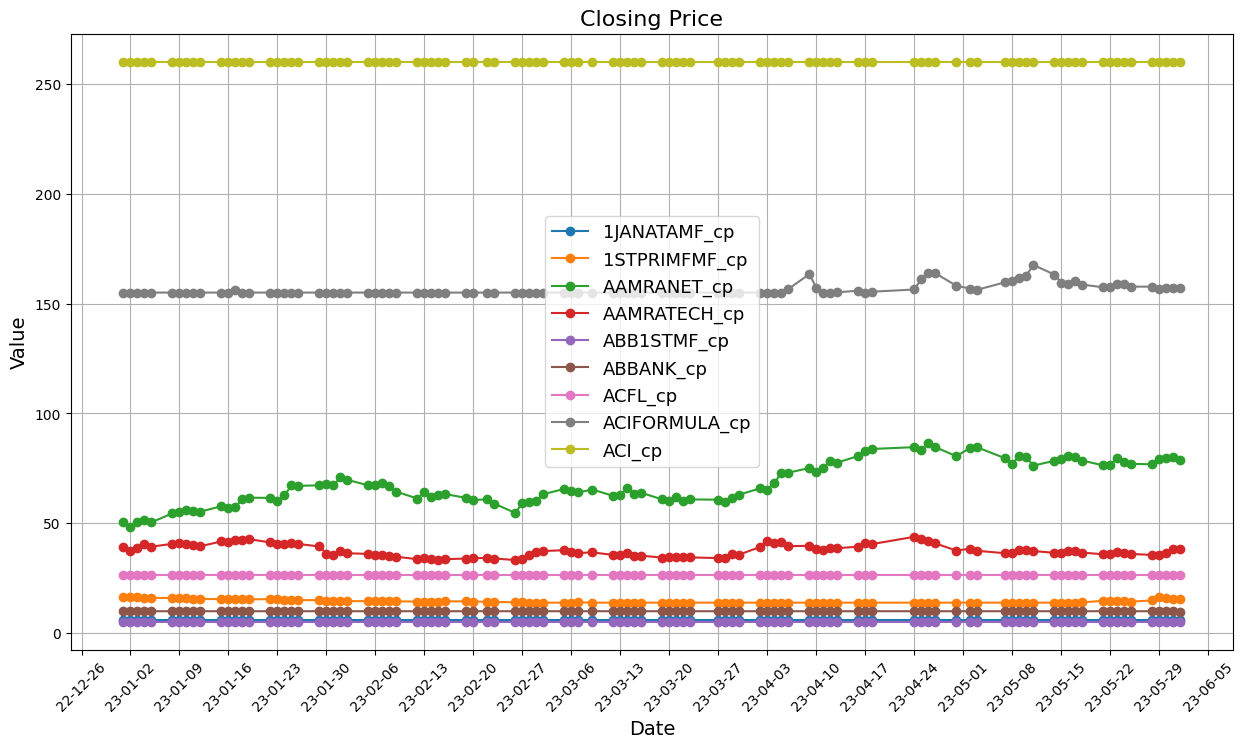

In [19]:
plot_columns(close, list(close.columns)[1:10])      

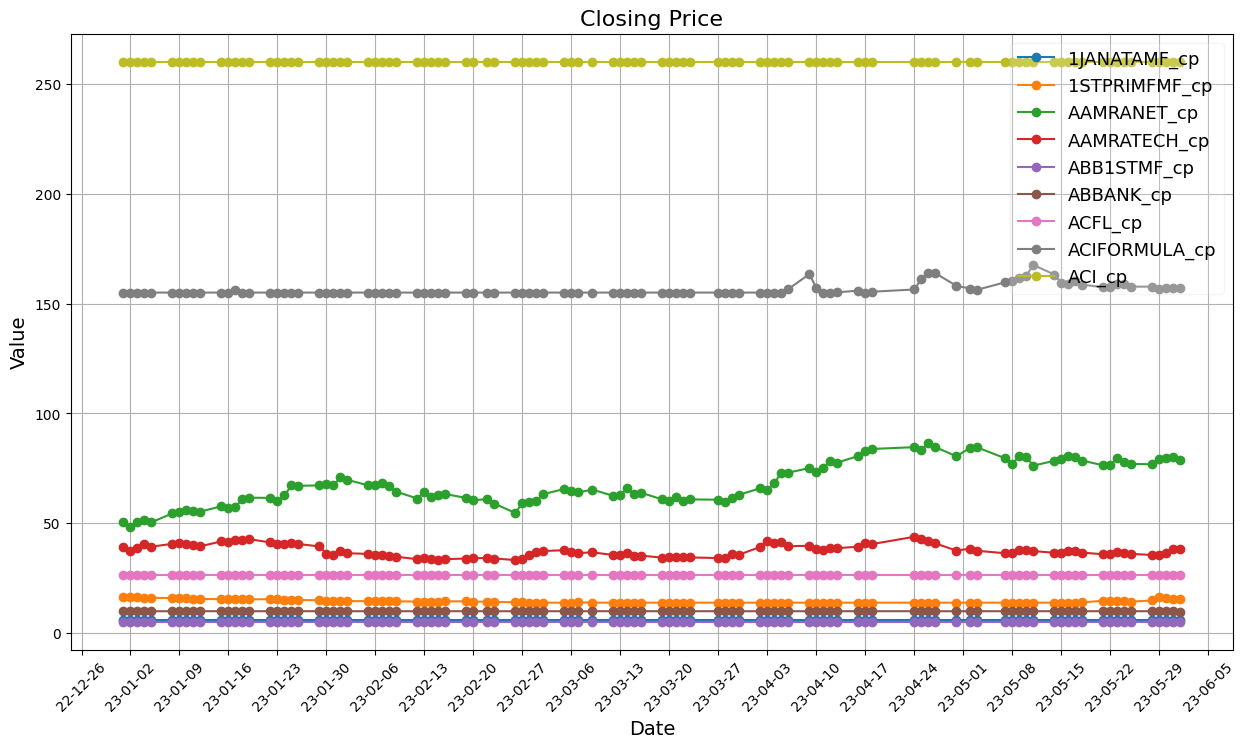

In [20]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
import pandas as pd

def plot_columns(dataframe, columns_to_plot):
    # Create a figure
    plt.figure(figsize=(15, 8))
    
    # Use the 'date' column as x-axis values
    x_values = pd.to_datetime(dataframe['date'])
    
    # Plot each specified column
    for col_name in columns_to_plot:
        plt.plot(
            x_values,
            dataframe[col_name],
            marker='o',
            linestyle='-',
            label=col_name
        )

    # Add a grid
    plt.grid(True)

    # Customize other plot attributes as needed
    plt.title('Closing Price', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    
    # Format the date on the x-axis as 'YY-MM-DD'
    date_format = DateFormatter('%y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    
    # Set ticks at the start of each week
    plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
    
    # Rotate the date labels for better readability
    plt.xticks(rotation=45)
    
    # Move the legend to the top-right corner and reduce opacity
    legend = plt.legend(fontsize=13, loc='upper right')
    legend.get_frame().set_alpha(0.2)
    
    # Display the plot
    plt.show()
    
plot_columns(close, list(close.columns)[1:10])      

In [ ]:
# Norm Prices

In [54]:
# close.iloc[0]
# norm = close.div(close.iloc[0]).mul(100)
# norm

# Select only the columns to be normalized (excluding the 'date' column)
columns_to_normalize = list(close.columns)[1:]

# Normalize the selected columns by dividing by their initial values
norm = close[columns_to_normalize].div(close.iloc[0][columns_to_normalize]).mul(100)

norm.insert(0, 'date', close['date'])

norm

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
0,2023-01-01,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2023-01-02,100.0,99.390244,95.82505,95.641026,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,99.465241,99.186992,100.0,99.004684
2,2023-01-03,100.0,98.780488,100.198807,99.74359,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,98.930481,98.373984,100.0,98.067916
3,2023-01-04,100.0,98.170732,102.584493,103.846154,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,98.395722,97.560976,100.0,97.131148
4,2023-01-05,100.0,97.560976,100.198807,100.769231,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,97.860963,96.747967,100.0,96.194379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,100.0,90.243902,152.683897,91.025641,100.0,100.0,100.0,101.741935,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,105.882353,81.300813,100.0,88.056206
98,2023-05-29,100.0,98.780488,157.455268,91.282051,100.0,100.0,100.0,101.096774,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,105.347594,81.300813,100.0,86.241218
99,2023-05-30,100.0,96.341463,158.250497,92.820513,100.0,100.0,100.0,101.419355,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,113.368984,80.487805,100.0,85.59719
100,2023-05-31,100.0,93.292683,159.44334,97.948718,100.0,100.0,100.0,101.225806,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,110.160428,80.487805,100.0,85.128806


In [42]:
close

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
0,2023-01-01,6.1,16.4,50.3,39.0,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.7,12.3,9.0,170.8
1,2023-01-02,6.1,16.3,48.2,37.3,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.6,12.2,9.0,169.1
2,2023-01-03,6.1,16.2,50.4,38.9,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.5,12.1,9.0,167.5
3,2023-01-04,6.1,16.1,51.6,40.5,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.4,12.0,9.0,165.9
4,2023-01-05,6.1,16.0,50.4,39.3,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.3,11.9,9.0,164.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,6.1,14.8,76.8,35.5,5.2,9.9,26.5,157.7,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,19.8,10.0,9.0,150.4
98,2023-05-29,6.1,16.2,79.2,35.6,5.2,9.9,26.5,156.7,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,19.7,10.0,9.0,147.3
99,2023-05-30,6.1,15.8,79.6,36.2,5.2,9.9,26.5,157.2,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,21.2,9.9,9.0,146.2
100,2023-05-31,6.1,15.3,80.2,38.2,5.2,9.9,26.5,156.9,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,20.6,9.9,9.0,145.4


In [23]:
# close.iloc[0][columns_to_normalize]

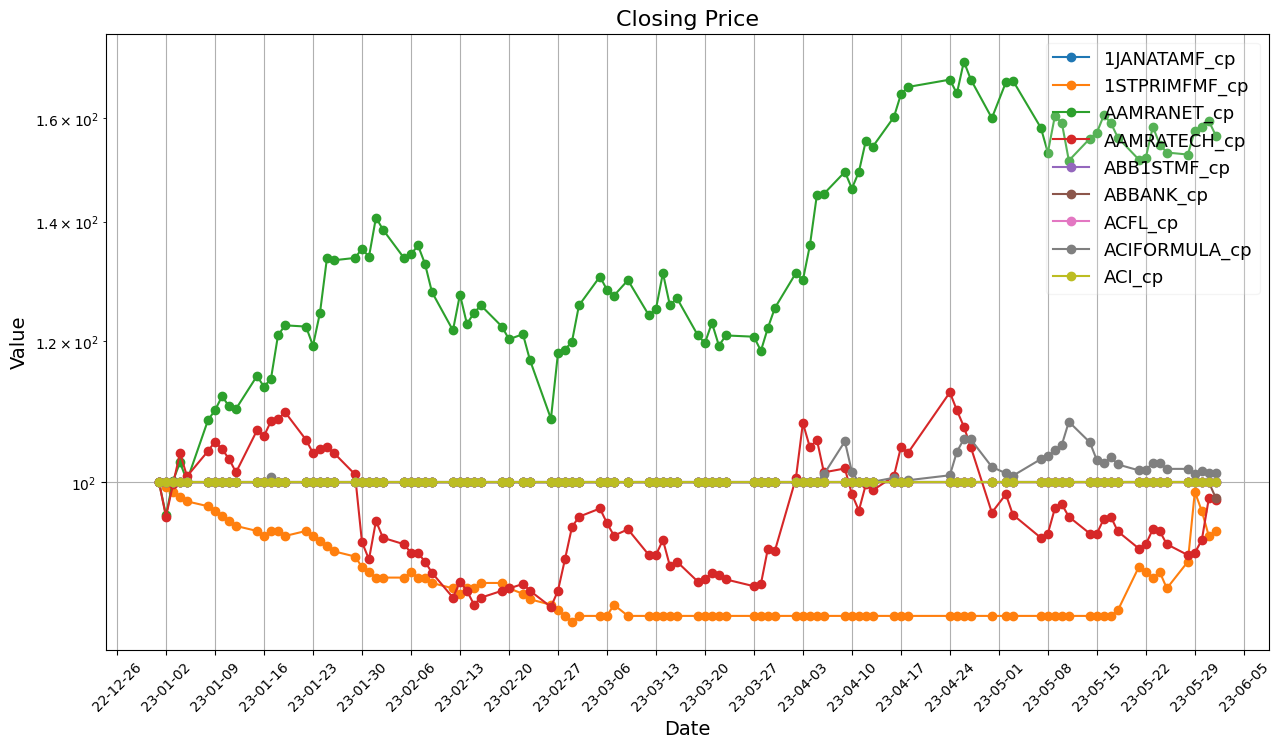

In [24]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
import pandas as pd

def plot_columns(dataframe, columns_to_plot, logy_=False):
    # Create a figure
    plt.figure(figsize=(15, 8), )
    
    # Use the 'date' column as x-axis values
    x_values = pd.to_datetime(dataframe['date'])
    
    # Plot each specified column
    for col_name in columns_to_plot:
        if logy_:
            # Enable logarithmic y-axis scale
            plt.yscale('log')
        plt.plot(
            x_values,
            dataframe[col_name],
            marker='o',
            linestyle='-',
            label=col_name,
            # logy=logy_
        )

    # Add a grid
    plt.grid(True)

    # Customize other plot attributes as needed
    plt.title('Closing Price', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    
    # Format the date on the x-axis as 'YY-MM-DD'
    date_format = DateFormatter('%y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    
    # Set ticks at the start of each week
    plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
    
    # Rotate the date labels for better readability
    plt.xticks(rotation=45)
    
    # Move the legend to the top-right corner and reduce opacity
    legend = plt.legend(fontsize=13, loc='upper right')
    legend.get_frame().set_alpha(0.2)
    
    # Display the plot
    plt.show()
    
plot_columns(norm, list(norm.columns)[1:10], logy_=True)      

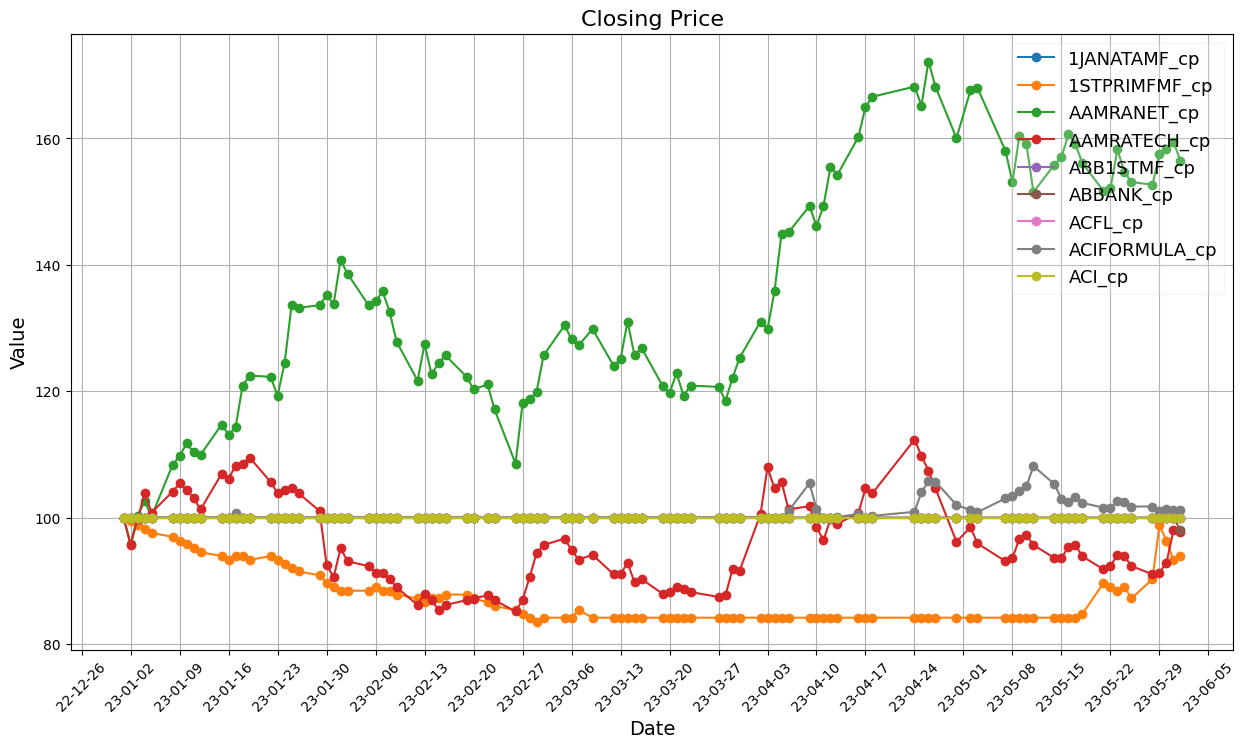

In [25]:
plot_columns(norm, list(norm.columns)[1:10], )      

In [26]:
norm.columns

Index(['date', '1JANATAMF_cp', '1STPRIMFMF_cp', 'AAMRANET_cp', 'AAMRATECH_cp',
       'ABB1STMF_cp', 'ABBANK_cp', 'ACFL_cp', 'ACIFORMULA_cp', 'ACI_cp',
       ...
       'VAMLBDMF1_cp', 'VAMLRBBF_cp', 'VFSTDL_cp', 'WALTONHIL_cp',
       'WATACHEM_cp', 'WMSHIPYARD_cp', 'YPL_cp', 'ZAHEENSPIN_cp',
       'ZAHINTEX_cp', 'ZEALBANGLA_cp'],
      dtype='object', length=647)

In [27]:
norm['AAMRANET_cp'].diff(periods=1)

0           NaN
1      -4.17495
2      4.373757
3      2.385686
4     -2.385686
         ...   
97    -0.397614
98     4.771372
99     0.795229
100    1.192843
101   -2.982107
Name: AAMRANET_cp, Length: 102, dtype: object

In [28]:
end_ = len(norm.keys()[1])-len('_cp')
norm.keys()[1][0:end_]


'1JANATAMF'

In [30]:
# for i norm['AAMRANET_cp'].pct_change(periods=1)

In [139]:
# close

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
0,2023-01-01,6.1,16.4,50.3,39.0,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.7,12.3,9.0,170.8
1,2023-01-02,6.1,16.3,48.2,37.3,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.6,12.2,9.0,169.1
2,2023-01-03,6.1,16.2,50.4,38.9,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.5,12.1,9.0,167.5
3,2023-01-04,6.1,16.1,51.6,40.5,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.4,12.0,9.0,165.9
4,2023-01-05,6.1,16.0,50.4,39.3,5.2,9.9,26.5,155.0,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,18.3,11.9,9.0,164.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,6.1,14.8,76.8,35.5,5.2,9.9,26.5,157.7,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,19.8,10.0,9.0,150.4
98,2023-05-29,6.1,16.2,79.2,35.6,5.2,9.9,26.5,156.7,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,19.7,10.0,9.0,147.3
99,2023-05-30,6.1,15.8,79.6,36.2,5.2,9.9,26.5,157.2,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,21.2,9.9,9.0,146.2
100,2023-05-31,6.1,15.3,80.2,38.2,5.2,9.9,26.5,156.9,260.2,...,7.3,7.4,22.2,1047.7,200.2,11.0,20.6,9.9,9.0,145.4


In [43]:
# # Initialize a list to store calculated columns
# calculated_columns = []

# # Iterate over columns in 'norm' DataFrame
# for col in norm.columns:
#     if col == 'date':
#         continue
#     end_ = len(col) - len('_cp')
#     new_col = col[:end_] + '_returns'
#     calculated_column = pd.Series(norm[col].pct_change(periods=1), name=new_col)
#     calculated_columns.append(calculated_column)

In [44]:
# norm

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
0,2023-01-01,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2023-01-02,100.0,99.390244,95.82505,95.641026,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,99.465241,99.186992,100.0,99.004684
2,2023-01-03,100.0,98.780488,100.198807,99.74359,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,98.930481,98.373984,100.0,98.067916
3,2023-01-04,100.0,98.170732,102.584493,103.846154,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,98.395722,97.560976,100.0,97.131148
4,2023-01-05,100.0,97.560976,100.198807,100.769231,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,97.860963,96.747967,100.0,96.194379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,100.0,90.243902,152.683897,91.025641,100.0,100.0,100.0,101.741935,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,105.882353,81.300813,100.0,88.056206
98,2023-05-29,100.0,98.780488,157.455268,91.282051,100.0,100.0,100.0,101.096774,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,105.347594,81.300813,100.0,86.241218
99,2023-05-30,100.0,96.341463,158.250497,92.820513,100.0,100.0,100.0,101.419355,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,113.368984,80.487805,100.0,85.59719
100,2023-05-31,100.0,93.292683,159.44334,97.948718,100.0,100.0,100.0,101.225806,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,110.160428,80.487805,100.0,85.128806


In [45]:
# # Concatenate the calculated columns into a new DataFrame
# calculated_columns_df = pd.concat(calculated_columns, axis=1)

# # Concatenate the 'calculated_columns_df' DataFrame with 'norm'
# norm = pd.concat([norm, calculated_columns_df], axis=1)

# norm

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_returns,VAMLRBBF_returns,VFSTDL_returns,WALTONHIL_returns,WATACHEM_returns,WMSHIPYARD_returns,YPL_returns,ZAHEENSPIN_returns,ZAHINTEX_returns,ZEALBANGLA_returns
0,2023-01-01,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-02,100.0,99.390244,95.82505,95.641026,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005348,-0.008130,0.0,-0.009953
2,2023-01-03,100.0,98.780488,100.198807,99.74359,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005376,-0.008197,0.0,-0.009462
3,2023-01-04,100.0,98.170732,102.584493,103.846154,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005405,-0.008264,0.0,-0.009552
4,2023-01-05,100.0,97.560976,100.198807,100.769231,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005435,-0.008333,0.0,-0.009644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,100.0,90.243902,152.683897,91.025641,100.0,100.0,100.0,101.741935,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.070423,0.000000,0.0,0.017591
98,2023-05-29,100.0,98.780488,157.455268,91.282051,100.0,100.0,100.0,101.096774,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005051,0.000000,0.0,-0.020612
99,2023-05-30,100.0,96.341463,158.250497,92.820513,100.0,100.0,100.0,101.419355,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.076142,-0.010000,0.0,-0.007468
100,2023-05-31,100.0,93.292683,159.44334,97.948718,100.0,100.0,100.0,101.225806,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.028302,0.000000,0.0,-0.005472


In [38]:
calculated_columns_df = None

In [49]:
# # Initialize a list to store calculated columns
# calculated_columns = []

# # Iterate over columns in 'norm' DataFrame
# for col in norm.columns:
#     if col == 'date':
#         continue
#     end_ = len(col) - len('_cp')
#     new_col = col[:end_] + '_returns'
#     calculated_column = pd.Series(norm[col].pct_change(periods=1), name=new_col)
#     calculated_columns.append(calculated_column)

# # Concatenate the calculated columns into a new DataFrame
# calculated_columns_df = pd.concat(calculated_columns, axis=1)

# # Concatenate the 'calculated_columns_df' DataFrame with 'norm'
# norm = pd.concat([norm, calculated_columns_df], axis=1)
norm

,date,1JANATAMF_cp,1STPRIMFMF_cp,AAMRANET_cp,AAMRATECH_cp,ABB1STMF_cp,ABBANK_cp,ACFL_cp,ACIFORMULA_cp,ACI_cp,...,VAMLBDMF1_cp,VAMLRBBF_cp,VFSTDL_cp,WALTONHIL_cp,WATACHEM_cp,WMSHIPYARD_cp,YPL_cp,ZAHEENSPIN_cp,ZAHINTEX_cp,ZEALBANGLA_cp
0,2023-01-01,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2023-01-02,100.0,99.390244,95.82505,95.641026,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,99.465241,99.186992,100.0,99.004684
2,2023-01-03,100.0,98.780488,100.198807,99.74359,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,98.930481,98.373984,100.0,98.067916
3,2023-01-04,100.0,98.170732,102.584493,103.846154,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,98.395722,97.560976,100.0,97.131148
4,2023-01-05,100.0,97.560976,100.198807,100.769231,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,97.860963,96.747967,100.0,96.194379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,100.0,90.243902,152.683897,91.025641,100.0,100.0,100.0,101.741935,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,105.882353,81.300813,100.0,88.056206
98,2023-05-29,100.0,98.780488,157.455268,91.282051,100.0,100.0,100.0,101.096774,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,105.347594,81.300813,100.0,86.241218
99,2023-05-30,100.0,96.341463,158.250497,92.820513,100.0,100.0,100.0,101.419355,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,113.368984,80.487805,100.0,85.59719
100,2023-05-31,100.0,93.292683,159.44334,97.948718,100.0,100.0,100.0,101.225806,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,110.160428,80.487805,100.0,85.128806


In [50]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [55]:
for i in norm.keys():
    if i == 'date':
        continue
    end_ = len(i)-len('_cp')
    new_col = i[0:end_] + '_returns'
    # norm[new_col] = norm[i].pct_change(periods=1)
    
    # Find the index of the column after which you want to insert the new column
    index_to_insert_after = norm.columns.get_loc(i) + 1

    # Use the insert method to add the new column after the specified column
    norm.insert(index_to_insert_after, new_col, norm[i].pct_change(periods=1))
    
norm

,date,1JANATAMF_cp,1JANATAMF_returns,1STPRIMFMF_cp,1STPRIMFMF_returns,AAMRANET_cp,AAMRANET_returns,AAMRATECH_cp,AAMRATECH_returns,ABB1STMF_cp,...,WMSHIPYARD_cp,WMSHIPYARD_returns,YPL_cp,YPL_returns,ZAHEENSPIN_cp,ZAHEENSPIN_returns,ZAHINTEX_cp,ZAHINTEX_returns,ZEALBANGLA_cp,ZEALBANGLA_returns
0,2023-01-01,100.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN,100.0,...,100.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN
1,2023-01-02,100.0,0.0,99.390244,-0.006098,95.82505,-0.041750,95.641026,-0.043590,100.0,...,100.0,0.0,99.465241,-0.005348,99.186992,-0.008130,100.0,0.0,99.004684,-0.009953
2,2023-01-03,100.0,0.0,98.780488,-0.006135,100.198807,0.045643,99.74359,0.042895,100.0,...,100.0,0.0,98.930481,-0.005376,98.373984,-0.008197,100.0,0.0,98.067916,-0.009462
3,2023-01-04,100.0,0.0,98.170732,-0.006173,102.584493,0.023810,103.846154,0.041131,100.0,...,100.0,0.0,98.395722,-0.005405,97.560976,-0.008264,100.0,0.0,97.131148,-0.009552
4,2023-01-05,100.0,0.0,97.560976,-0.006211,100.198807,-0.023256,100.769231,-0.029630,100.0,...,100.0,0.0,97.860963,-0.005435,96.747967,-0.008333,100.0,0.0,96.194379,-0.009644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,100.0,0.0,90.243902,0.034965,152.683897,-0.002597,91.025641,-0.013889,100.0,...,100.0,0.0,105.882353,-0.070423,81.300813,0.000000,100.0,0.0,88.056206,0.017591
98,2023-05-29,100.0,0.0,98.780488,0.094595,157.455268,0.031250,91.282051,0.002817,100.0,...,100.0,0.0,105.347594,-0.005051,81.300813,0.000000,100.0,0.0,86.241218,-0.020612
99,2023-05-30,100.0,0.0,96.341463,-0.024691,158.250497,0.005051,92.820513,0.016854,100.0,...,100.0,0.0,113.368984,0.076142,80.487805,-0.010000,100.0,0.0,85.59719,-0.007468
100,2023-05-31,100.0,0.0,93.292683,-0.031646,159.44334,0.007538,97.948718,0.055249,100.0,...,100.0,0.0,110.160428,-0.028302,80.487805,0.000000,100.0,0.0,85.128806,-0.005472


In [56]:
norm.columns

Index(['date', '1JANATAMF_cp', '1JANATAMF_returns', '1STPRIMFMF_cp',
       '1STPRIMFMF_returns', 'AAMRANET_cp', 'AAMRANET_returns', 'AAMRATECH_cp',
       'AAMRATECH_returns', 'ABB1STMF_cp',
       ...
       'WMSHIPYARD_cp', 'WMSHIPYARD_returns', 'YPL_cp', 'YPL_returns',
       'ZAHEENSPIN_cp', 'ZAHEENSPIN_returns', 'ZAHINTEX_cp',
       'ZAHINTEX_returns', 'ZEALBANGLA_cp', 'ZEALBANGLA_returns'],
      dtype='object', length=1293)

In [57]:
# norm = norm.sort_index(axis=1)
# # Define the desired column order with 'Date' at the beginning
# desired_column_order = ['date'] + [col for col in norm.columns if col != 'date']

# # Reorder the columns
# norm = norm[desired_column_order]
# norm = norm.reset_index(drop=True)
# norm

In [58]:
returns_columns = []

for i in norm.keys():
    if i.endswith('_returns'):
        returns_columns.append(i)
        
len(returns_columns)

646

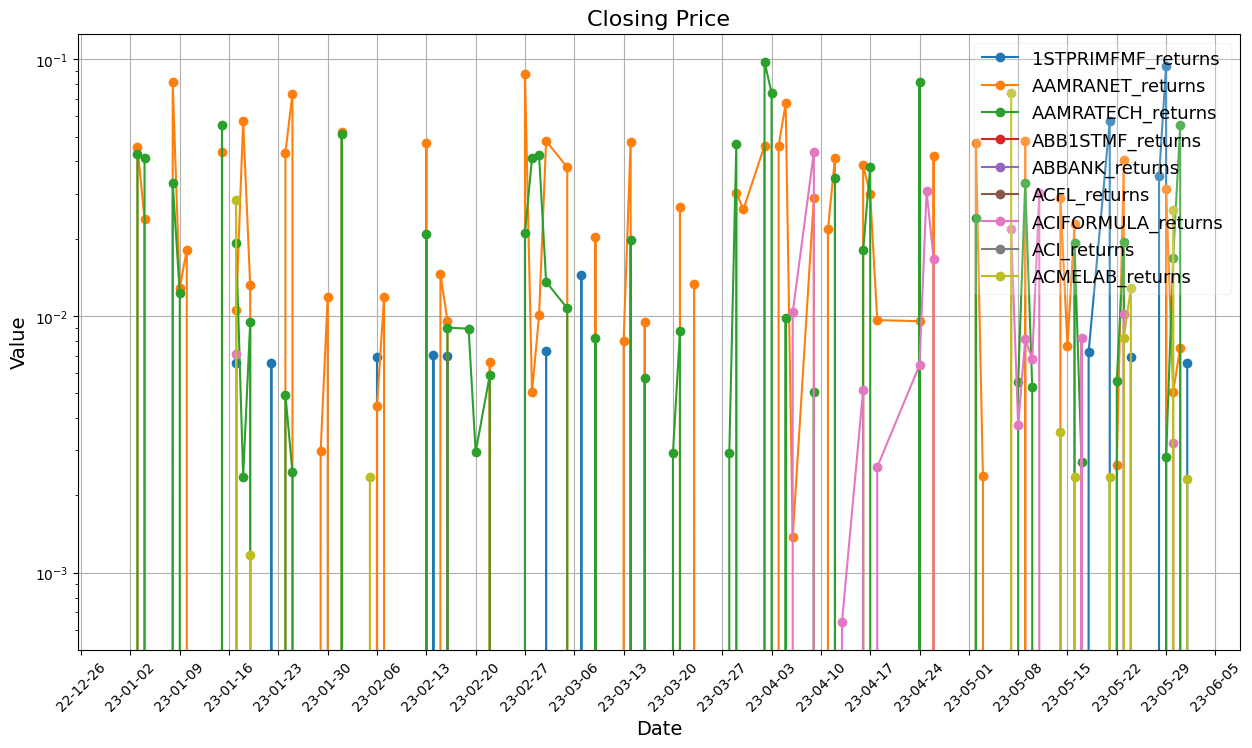

In [59]:
plot_columns(norm, list(returns_columns)[1:10], logy_=True)      

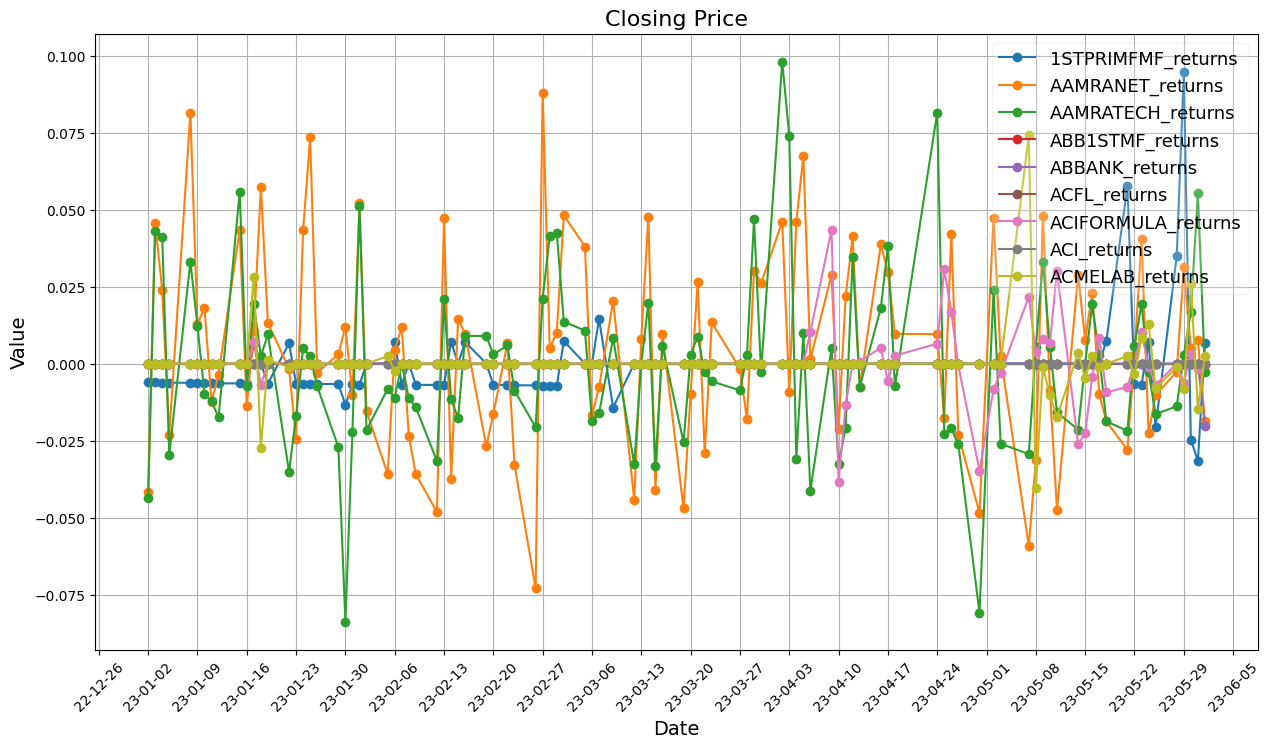

In [60]:
plot_columns(norm, list(returns_columns)[1:10], logy_=False)      

In [61]:
# # Extract the unique company names
# company_names = set(col.split('_')[0] for col in norm.columns if '_' in col)
# # company_names

# Extract company names in the order they appear in 'norm' columns
company_names = []
for col in norm.columns:
    if '_' in col:
        company_name = col.split('_')[0]
        if company_name not in company_names:
            company_names.append(company_name)

In [210]:
# # Define the order of columns for each company
# column_order = []

# j = 0
# for company_name in company_names:
# #     print(company_name)
    
# #     if j == 5:
# #         break
# #     j=j+1
#     # column_order.extend([f'{company_name}_cp', f'{company_name}_returns'])
#     column_order.append(f'{company_name}_cp')
#     column_order.append(f'{company_name}_returns')

# # # Reorder the columns in the DataFrame
# # norm = norm[['date'] + column_order]
# # norm
# # column_order.reverse()
# # column_order

In [62]:
norm.columns

Index(['date', '1JANATAMF_cp', '1JANATAMF_returns', '1STPRIMFMF_cp',
       '1STPRIMFMF_returns', 'AAMRANET_cp', 'AAMRANET_returns', 'AAMRATECH_cp',
       'AAMRATECH_returns', 'ABB1STMF_cp',
       ...
       'WMSHIPYARD_cp', 'WMSHIPYARD_returns', 'YPL_cp', 'YPL_returns',
       'ZAHEENSPIN_cp', 'ZAHEENSPIN_returns', 'ZAHINTEX_cp',
       'ZAHINTEX_returns', 'ZEALBANGLA_cp', 'ZEALBANGLA_returns'],
      dtype='object', length=1293)

In [63]:
# norm = norm.sort_index(axis=1)
# # Define the desired column order with 'Date' at the beginning
# desired_column_order = ['date'] + column_order 

# # Reorder the columns
# norm = norm[desired_column_order]
# norm = norm.reset_index(drop=True)
# norm

In [229]:
# norm = norm.sort_index(axis=1)
# # Define the desired column order with 'Date' at the beginning
# desired_column_order = ['date'] + column_order

# # Reorder the columns
# norm = norm[desired_column_order]
# norm = norm.reset_index(drop=True)
# norm

In [64]:
norm

,date,1JANATAMF_cp,1JANATAMF_returns,1STPRIMFMF_cp,1STPRIMFMF_returns,AAMRANET_cp,AAMRANET_returns,AAMRATECH_cp,AAMRATECH_returns,ABB1STMF_cp,...,WMSHIPYARD_cp,WMSHIPYARD_returns,YPL_cp,YPL_returns,ZAHEENSPIN_cp,ZAHEENSPIN_returns,ZAHINTEX_cp,ZAHINTEX_returns,ZEALBANGLA_cp,ZEALBANGLA_returns
0,2023-01-01,100.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN,100.0,...,100.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN
1,2023-01-02,100.0,0.0,99.390244,-0.006098,95.82505,-0.041750,95.641026,-0.043590,100.0,...,100.0,0.0,99.465241,-0.005348,99.186992,-0.008130,100.0,0.0,99.004684,-0.009953
2,2023-01-03,100.0,0.0,98.780488,-0.006135,100.198807,0.045643,99.74359,0.042895,100.0,...,100.0,0.0,98.930481,-0.005376,98.373984,-0.008197,100.0,0.0,98.067916,-0.009462
3,2023-01-04,100.0,0.0,98.170732,-0.006173,102.584493,0.023810,103.846154,0.041131,100.0,...,100.0,0.0,98.395722,-0.005405,97.560976,-0.008264,100.0,0.0,97.131148,-0.009552
4,2023-01-05,100.0,0.0,97.560976,-0.006211,100.198807,-0.023256,100.769231,-0.029630,100.0,...,100.0,0.0,97.860963,-0.005435,96.747967,-0.008333,100.0,0.0,96.194379,-0.009644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-05-28,100.0,0.0,90.243902,0.034965,152.683897,-0.002597,91.025641,-0.013889,100.0,...,100.0,0.0,105.882353,-0.070423,81.300813,0.000000,100.0,0.0,88.056206,0.017591
98,2023-05-29,100.0,0.0,98.780488,0.094595,157.455268,0.031250,91.282051,0.002817,100.0,...,100.0,0.0,105.347594,-0.005051,81.300813,0.000000,100.0,0.0,86.241218,-0.020612
99,2023-05-30,100.0,0.0,96.341463,-0.024691,158.250497,0.005051,92.820513,0.016854,100.0,...,100.0,0.0,113.368984,0.076142,80.487805,-0.010000,100.0,0.0,85.59719,-0.007468
100,2023-05-31,100.0,0.0,93.292683,-0.031646,159.44334,0.007538,97.948718,0.055249,100.0,...,100.0,0.0,110.160428,-0.028302,80.487805,0.000000,100.0,0.0,85.128806,-0.005472
